In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d salader/dogs-vs-cats


 99% 1.05G/1.06G [00:05<00:00, 269MB/s]
100% 1.06G/1.06G [00:05<00:00, 221MB/s]


In [2]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [4]:
train_data = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

val_data = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [5]:
 #Normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_data=train_data.map(process)
val_data=val_data.map(process)

In [6]:
#CNN Model
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history=model.fit(train_data,epochs=10,validation_data=val_data)

Epoch 1/10
625/625 [==============================] - 60s 84ms/step - loss: 0.6172 - accuracy: 0.6564 - val_loss: 0.5856 - val_accuracy: 0.6784
Epoch 2/10
625/625 [==============================] - 52s 83ms/step - loss: 0.4824 - accuracy: 0.7658 - val_loss: 0.5100 - val_accuracy: 0.7616
Epoch 3/10
625/625 [==============================] - 54s 86ms/step - loss: 0.3726 - accuracy: 0.8287 - val_loss: 0.5329 - val_accuracy: 0.7862
Epoch 4/10
625/625 [==============================] - 53s 84ms/step - loss: 0.2360 - accuracy: 0.8995 - val_loss: 0.6536 - val_accuracy: 0.7814
Epoch 5/10
625/625 [==============================] - 51s 81ms/step - loss: 0.1274 - accuracy: 0.9515 - val_loss: 0.8232 - val_accuracy: 0.7866
Epoch 6/10
625/625 [==============================] - 51s 81ms/step - loss: 0.0773 - accuracy: 0.9734 - val_loss: 0.9149 - val_accuracy: 0.7760
Epoch 7/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0569 - accuracy: 0.9804 - val_loss: 1.1465 - val_accuracy:

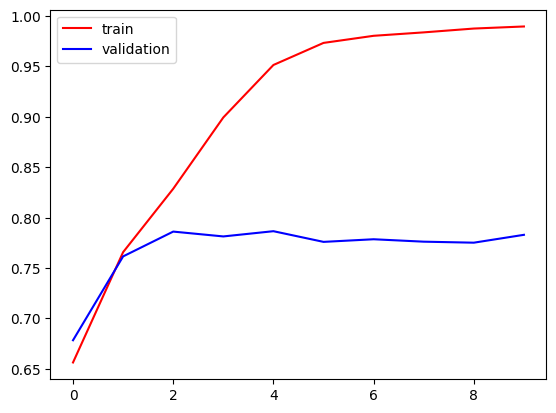

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

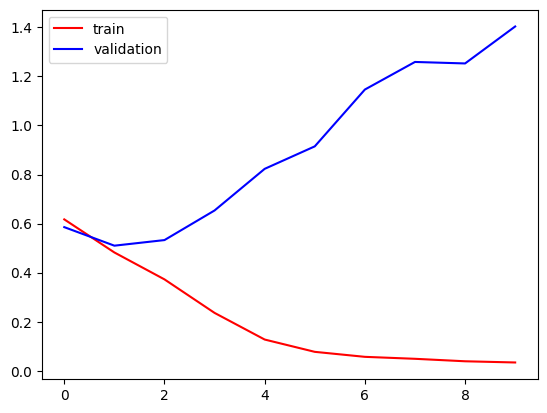

In [11]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [12]:
''' Ways to reduce Overfitting

Add more data
Data Augmentation
L1/L2 Regularizer
Dropout
Batch Norm
Reduce Complexity '''

' Ways to reduce Overfitting\n\nAdd more data\nData Augmentation\nL1/L2 Regularizer\nDropout\nBatch Norm\nReduce Complexity '

In [15]:
from keras.layers import Dropout,BatchNormalization

In [16]:
#New CNN Model
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history=model.fit(train_data,epochs=10,validation_data=val_data)

Epoch 1/10
625/625 [==============================] - 72s 106ms/step - loss: 1.5124 - accuracy: 0.5660 - val_loss: 0.6860 - val_accuracy: 0.5452
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.6255 - accuracy: 0.6406 - val_loss: 0.6280 - val_accuracy: 0.6370
Epoch 3/10
625/625 [==============================] - 68s 109ms/step - loss: 0.5548 - accuracy: 0.7047 - val_loss: 0.6665 - val_accuracy: 0.6592
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4872 - accuracy: 0.7574 - val_loss: 0.5086 - val_accuracy: 0.7562
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4192 - accuracy: 0.7961 - val_loss: 0.4697 - val_accuracy: 0.7710
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3693 - accuracy: 0.8267 - val_loss: 0.5503 - val_accuracy: 0.7612
Epoch 7/10
625/625 [==============================] - 69s 109ms/step - loss: 0.3168 - accuracy: 0.8516 - val_loss: 0.6610 - val_ac

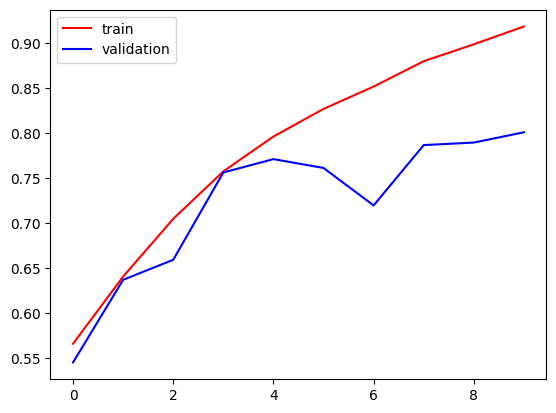

In [20]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

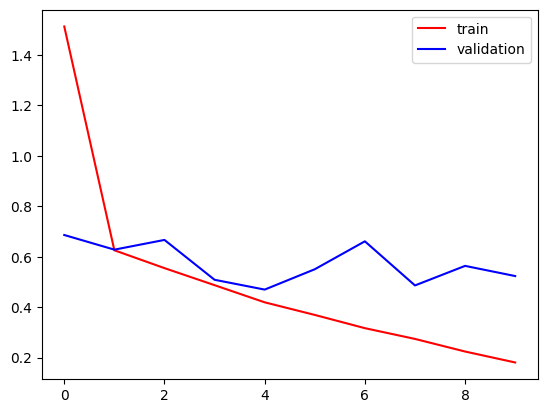

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()